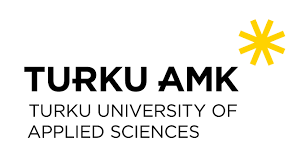

# Homework Assignment 01: Sales Data Analysis
Created by Golnaz Sahebi, Organized by Gemini, Autumn 2025

### Objective:
In this classwork, you will analyze a small dataset of sales records. You will practice:
- Creating a DataFrame from a Python dictionary.
- Calculating new columns based on existing data.
- Filtering and sorting data to find specific information.
- Grouping data to perform aggregate calculations.

### Evaluation: 
You can earn at most **10 points** from this homework and you need to do self-assessment on ITS.

### Instructions:
You are provided with a dataset of product sales with the following columns:
- **Product_ID:** A unique identifier for the product.
- **Category:** The category the product belongs to.
- **Unit_Price:** The price of a single unit of the product.
- **Units_Sold:** The number of units sold.
- **Region:** The region where the sale occurred.

---
#### 1. Create the DataFrame (1 point)
Use the provided sales data to create a Pandas DataFrame.
- **Hint:** Create a dictionary where keys are the column names and values are lists of the data.



In [1]:
import pandas as pd

# Sales data in a dictionary

data = {
'Product_ID': ['PR01', 'PR02', 'PR03', 'PR04', 'PR05', 'PR06'],
'Category': ['Electronics', 'Clothing', 'Electronics', 'Home Goods', 'Clothing', 'Home Goods'],
'Unit_Price': [500, 40, 1200, 150, 55, 200],
'Units_Sold': [20, 150, 10, 80, 120, 60],
'Region': ['North', 'South', 'North', 'West', 'South', 'West']
}


# Creating the DataFrame

df = pd.DataFrame(data)


# Displaying the DataFrame to verify its structure

print(df)

  Product_ID     Category  Unit_Price  Units_Sold Region
0       PR01  Electronics         500          20  North
1       PR02     Clothing          40         150  South
2       PR03  Electronics        1200          10  North
3       PR04   Home Goods         150          80   West
4       PR05     Clothing          55         120  South
5       PR06   Home Goods         200          60   West


#### 2. Calculate Total Revenue (1 point)
Create a new column named `Total_Revenue` which is the `Unit_Price` multiplied by the `Units_Sold`.


In [2]:
#Creating new column and calculating the Total Revenue

df['Total_Revenue'] = (df['Unit_Price'] * df['Units_Sold'])

#Printing the new DataFrame with the new column

print(df)

  Product_ID     Category  Unit_Price  Units_Sold Region  Total_Revenue
0       PR01  Electronics         500          20  North          10000
1       PR02     Clothing          40         150  South           6000
2       PR03  Electronics        1200          10  North          12000
3       PR04   Home Goods         150          80   West          12000
4       PR05     Clothing          55         120  South           6600
5       PR06   Home Goods         200          60   West          12000


### 3. Filter for High-Revenue Products (1 point)
Find all products that generated a `Total_Revenue` of more than **$10,000** and display their records.

In [3]:
#Filtering all products with generated Total_Revenue of more than $10,000

high_revenue_products = df[df['Total_Revenue'] > 10000]

#Printing the filtered DataFrame

print(high_revenue_products)

  Product_ID     Category  Unit_Price  Units_Sold Region  Total_Revenue
2       PR03  Electronics        1200          10  North          12000
3       PR04   Home Goods         150          80   West          12000
5       PR06   Home Goods         200          60   West          12000


#### 4. Find the Average Unit Price (1 point)
Calculate and display the **average** `Unit_Price` of all **products**.

In [4]:
#Calculating the average Unit Price for all products

average_unit_price = df['Unit_Price'].mean()

#Printing the average Unit Price

print(average_unit_price)

357.5


#### 5. Sort Products by Units Sold (1 point)
Sort the DataFrame in **descending order** based on the number of `Units_Sold`.

In [5]:
#Sorting the DataFreame in descending order according to the number of Units_Sold

sorted_by_units_sold = df.sort_values(by = 'Units_Sold', ascending = False)

#Printing the sorted DataFrame

print(sorted_by_units_sold)

  Product_ID     Category  Unit_Price  Units_Sold Region  Total_Revenue
1       PR02     Clothing          40         150  South           6000
4       PR05     Clothing          55         120  South           6600
3       PR04   Home Goods         150          80   West          12000
5       PR06   Home Goods         200          60   West          12000
0       PR01  Electronics         500          20  North          10000
2       PR03  Electronics        1200          10  North          12000


#### 6. Group by Category and Calculate Total Revenue (1 point)
Group the products by `Category` and calculate the total revenue for each category.

In [6]:
#Filtering products by Category and then calculating the total revenue for each

category_revenue = df.groupby('Category')['Total_Revenue'].sum()

#Printing

print(category_revenue)

Category
Clothing       12600
Electronics    22000
Home Goods     24000
Name: Total_Revenue, dtype: int64


#### 7. Find the Best-Selling Product in the 'South' Region (1 point)
First, filter for sales in the 'South' region. Then, find the product with the highest `Units_Sold` within that region.

In [7]:
#Filtering sales from South and finding the product with the highest Units Sold

south_df = df[df['Region'] == 'South']
south_products = south_df['Units_Sold'].max()

#Printing

print(south_products)

150


#### 8. Add a Column 'Discount_Eligible' (Without apply() or lambda) (1 point)
Add a new column **'Discount_Eligible'**. The eligibility is determined as follows:

- If a product is in the **'Electronics'** category, it is **'Not Eligible'**.
- Otherwise, it is **'Eligible'**.
- **Hint:** Initialize the column with a default value ('Eligible') and then use `.loc[]` to update the rows for the 'Electronics' category.




In [8]:
# Adding new column with default value "Eligible"

df['Discount_Eligible'] = "Eligible"

# Updating rows where Category == 'Electronics' to "Not Eligible"

df.loc[df['Category'] == 'Electronics', 'Discount_Eligible'] = 'Not Eligible'

# Printing

print(df)

  Product_ID     Category  Unit_Price  Units_Sold Region  Total_Revenue  \
0       PR01  Electronics         500          20  North          10000   
1       PR02     Clothing          40         150  South           6000   
2       PR03  Electronics        1200          10  North          12000   
3       PR04   Home Goods         150          80   West          12000   
4       PR05     Clothing          55         120  South           6600   
5       PR06   Home Goods         200          60   West          12000   

  Discount_Eligible  
0      Not Eligible  
1          Eligible  
2      Not Eligible  
3          Eligible  
4          Eligible  
5          Eligible  


#### 9. Add a Column 'Discount_Eligible' (Using apply() and lambda) (2 points)
Add a new column **'Discount_Eligible'** using a more advanced method. The logic remains the same:

- If a product is in the **'Electronics'** category, it is **'Not Eligible'**.
- Otherwise, it is **'Eligigble'**.


In [9]:
# Adding a new column using apply() and lambda

df['Discount_Eligible2'] = df['Category'].apply(lambda x: 'Not Eligible' if x == 'Electronics' else 'Eligible')

# Printing

print(df)

  Product_ID     Category  Unit_Price  Units_Sold Region  Total_Revenue  \
0       PR01  Electronics         500          20  North          10000   
1       PR02     Clothing          40         150  South           6000   
2       PR03  Electronics        1200          10  North          12000   
3       PR04   Home Goods         150          80   West          12000   
4       PR05     Clothing          55         120  South           6600   
5       PR06   Home Goods         200          60   West          12000   

  Discount_Eligible Discount_Eligible2  
0      Not Eligible       Not Eligible  
1          Eligible           Eligible  
2      Not Eligible       Not Eligible  
3          Eligible           Eligible  
4          Eligible           Eligible  
5          Eligible           Eligible  


### Good Luck!